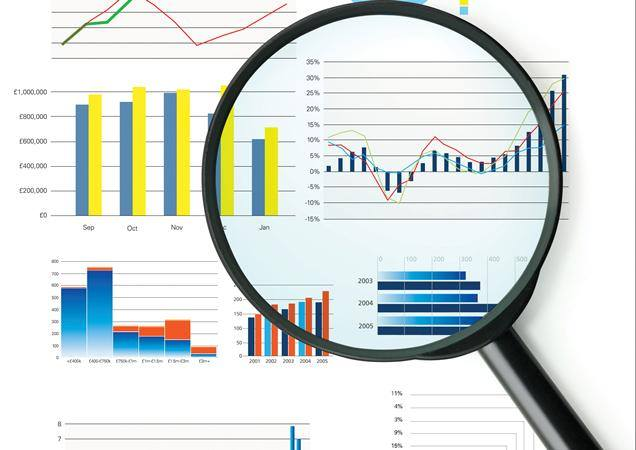

# **Projeto**
**Título :** Análise da probabilidade de distúrbio mental no trabalho com uso do classificador de Naive Bayes

Este projeto tem como objetivo utilizar o classificador de Naive Bayes para prever a existência de colaboradores com potencial para adquirir doenças mentais, como também, realizar uma análise exploratória para identificar as principais características dos entrevistados por faixa etária, principalmente, o público Jovem, uma vez que estes estão no início de suas carreiras. Além disso, pretende-se entender como as empresas vem se comportando em relação a este tema. Pois, sabe-se que o quanto antes houver um pré-diagnóstico, ações mais assertivas podem ser tomadas para promover um ambiente de trabalho mais saudável.

# **Análise Exploratória dos Dados**

Utilizou uma base de dados da plataforma [Kaggle](https://www.kaggle.com/shreyaspj/mental-health), a qual faz um estudo em relação a saúde mental dos trabalhadores que atuam na área da tecnologia, o estudo foi realizado entre os anos de 2014 a 2016, para tanto realizou-se uma pesquisa do tipo survey para responder as questões que expressassem as opiniões dos trabalhadores em relação a sua percepção de saúde mental em relação ao trabalho e a atuação das empresas frente a esse assunto.

Portanto, nossa análise exploratória pretende responder as seguintes questões de pesquisa.
1. Qual a faixa etária dos entrevistados?
2. Quais as principais diferenças da saúde mental dos entrevistados por faixa etária?
3. Os Jovens apresentam problemas de saúde mental?
4. Os Jovens estão mais acessíveis para discutir quanto a sua saúde mental?
5. As empresas são transparentes nas ações de prevenção e cuidados em relação a saúde mental para seus colaboradores?

**Faixa Etária**

* Jovens - 18 a 24 anos
* Adultos - 25 a 59 anos
* Maior Idade - Acima de 59 anos

**Dicionário dos Dados:**

 |Atributo                 |     Dicionário                                    |
|-------------------------|---------------------------------------------------|
|Age                      | Idade                                             |
|Gender                   | Gênero                                            |
|Country                  | País                                              |
|state                    | Estado                                            | 
|self_employed            | Você trabalha por conta própria?                  |
|family_history           | Você tem histórico familiar de doença mental?     |
|treatment                | Você procurou tratamento para um problema de saúde mental?                                                                       |
|work_interfere           | Se você tem um problema de saúde mental, acha que         isso interfere no seu trabalho?                                    |
|no_employees             | Quantos funcionários sua empresa ou organização possui?                                                                       |
|remote_work              | Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?                                                           |
|tech_company             | O seu empregador é principalmente uma empresa / organização de tecnologia?                                                    |
|benefits                 | O seu empregador oferece benefícios para a saúde mental?                                                                       |
|care_options             | Você conhece as opções de cuidados de saúde mental que seu empregador oferece?                                                   |
|wellness_program         | Seu empregador já discutiu saúde mental como parte de um programa de bem-estar de funcionários?                                  |
|seek_help                | Seu empregador fornece recursos para aprender mais sobre   questões de saúde mental e como procurar ajuda?                       | 
|anonymity                | O seu anonimato é protegido se você optar por tirar proveito dos recursos de tratamento de saúde mental ou abuso de substâncias?  |
|leave                    | É fácil para você tirar uma licença médica por um problema de saúde mental?                                                     |
|mental_health_consequence| Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?                             |
|phys_health_consequence  | Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?                             |
|coworkers                | Você estaria disposto a discutir um problema de   saúde mental com seus colegas de trabalho?                                    |
|supervisor               | Você estaria disposto a discutir um problema de saúde mental com seu (s) supervisor (es) direto (s)?                          |
|mental_health_interview  | Você mencionaria um problema de saúde mental com um potencial empregador em uma entrevista?                                       |
|phys_health_interview    | Você mencionaria um problema de saúde física com um potencial empregador em uma entrevista?                                       |
|mental_vs_physical       | Você acha que seu empregador leva a saúde mental  tão a sério quanto a saúde física?                                            |
|obs_consequence          | Você já ouviu falar ou observou consequências negativas para colegas de trabalho com problemas de saúde mental no seu local de trabalho?                                                                  |

**Limpeza e Tratamento do Dados**

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#apenas para facilitar a plotagem dos gráficos
%matplotlib inline 

Lendo o DataFrame

In [3]:
saude_mental = pd.read_csv("survey_saude_mental.csv")

Visualizando as 5 primeiras linhas do DataFrame para conhecer seus atributos.

In [4]:
saude_mental.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Visualizando a quantidade total de entrada de dados e número de variáveis.

In [5]:
saude_mental.shape

(1259, 27)

Obtendo informações gerais do DataFrame como total de linhas e colunas, a quantidade de respostas para cada atributo, além dos tipos de dados de cada atributo. 

In [6]:
saude_mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**Limpeza e Enriquecimento dos dados**

Observa-se que o DataFrame possui na sua maioria atributos do tipo object, nesse caso, faremos a conversão desses atributos para categóricos, com intuito de melhorar o desempenho da leitura do nosso DataFrame.

In [7]:
saude_mental['Timestamp'] = saude_mental['Timestamp'].astype('category')
saude_mental['Gender'] = saude_mental['Gender'].astype('category')
saude_mental['Country'] = saude_mental['Country'].astype('category')
saude_mental['state'] = saude_mental['state'].astype('category')
saude_mental['self_employed'] = saude_mental['self_employed'].astype('category')
saude_mental['family_history'] = saude_mental['family_history'].astype('category')
saude_mental['treatment'] = saude_mental['treatment'].astype('category')
saude_mental['work_interfere'] = saude_mental['work_interfere'].astype('category')
saude_mental['no_employees'] = saude_mental['no_employees'].astype('category')
saude_mental['remote_work'] = saude_mental['remote_work'].astype('category')
saude_mental['tech_company'] = saude_mental['tech_company'].astype('category')
saude_mental['benefits'] = saude_mental['benefits'].astype('category')
saude_mental['care_options'] = saude_mental['care_options'].astype('category')
saude_mental['wellness_program'] = saude_mental['wellness_program'].astype('category')
saude_mental['seek_help'] = saude_mental['seek_help'].astype('category')
saude_mental['anonymity'] = saude_mental['anonymity'].astype('category')
saude_mental['leave'] = saude_mental['leave'].astype('category')
saude_mental['mental_health_consequence'] = saude_mental['mental_health_consequence'].astype('category')
saude_mental['phys_health_consequence'] = saude_mental['phys_health_consequence'].astype('category')
saude_mental['coworkers'] = saude_mental['coworkers'].astype('category')
saude_mental['supervisor'] = saude_mental['supervisor'].astype('category')
saude_mental['mental_health_interview'] = saude_mental['mental_health_interview'].astype('category')
saude_mental['phys_health_interview'] = saude_mental['phys_health_interview'].astype('category')
saude_mental['mental_vs_physical'] = saude_mental['mental_vs_physical'].astype('category')
saude_mental['obs_consequence'] = saude_mental['obs_consequence'].astype('category')
saude_mental['comments'] = saude_mental['comments'].astype('category')

Visualizando os tipos dos atributos após a alteração.

In [8]:
saude_mental.dtypes

Timestamp                    category
Age                             int64
Gender                       category
Country                      category
state                        category
self_employed                category
family_history               category
treatment                    category
work_interfere               category
no_employees                 category
remote_work                  category
tech_company                 category
benefits                     category
care_options                 category
wellness_program             category
seek_help                    category
anonymity                    category
leave                        category
mental_health_consequence    category
phys_health_consequence      category
coworkers                    category
supervisor                   category
mental_health_interview      category
phys_health_interview        category
mental_vs_physical           category
obs_consequence              category
comments    

Agora iremos visualizar a quantidade de dados ausentes no DataFrame.

In [9]:
saude_mental.isnull().sum()


Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Primeiramente, vamos excluir as variáveis que não utilizaremos na nossa análise.

In [10]:
saude_mental.drop(columns=['state','comments', 'self_employed',],inplace=True)

Agora iremos substituir os valores da variável work_interfere pelo valor mais recorrente, uma vez que, essa variável é importante para nossa análise.

In [11]:
#Visualizando a quantidade total de cada categoria do atributo work_interfere.
saude_mental['work_interfere'].value_counts()


Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [12]:
# Atribuindo o valor mais recorrente para as linhas que possuem valores nulos no atributo acima. 
saude_mental['work_interfere'].fillna(value='Sometimes', inplace=True)

In [13]:
saude_mental['work_interfere'].value_counts()


Sometimes    729
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

Visualizando novamente a quantidade de Dados ausentes.

In [14]:
saude_mental.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [15]:
saude_mental.shape

(1259, 24)

Limpeza realizada com sucesso.

**Enriquecimento dos dados**

Primeiramente, iremos criar um novo atributo para guardar o ano de resposta de cada entrevista pois a utilizaremos para a nossa análise mais a frente.

In [16]:
#Criando a coluna Ano e formatando os dados para guardar apenas o ano.
saude_mental['Year'] = saude_mental['Timestamp'].map(lambda x: str(x)[0:4] if x is not np.NaN else np.NaN)

Dropando a variável Timestamp, já que criamos uma variável para transformar e guardar apenas o ano da resposta de cada entrevistado.

In [17]:
saude_mental.drop(columns=['Timestamp'],inplace=True)

Finalizamos o tratamento e limpeza do nosso DataFrame, vamos salvá-lo e em um outro notebook vamos realizar a pesquisa estatística descritiva.

In [18]:
saude_mental.to_csv('saude_mental_tratamento_limpeza_dos_dados.csv', index=False)